# Install Library

In [ ]:
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Import Dataset

In [ ]:
# Read dataset
df = pd.read_csv('dummy_data_fitur1 (3).csv')

In [ ]:
columns_to_drop = ['company_name', 'company_pic', 'company_address', 'company_phone',
                   'company_email', 'training_topic', 'trainer_name', 'sales_person',
                   'training_dates']
df = df.drop(columns=columns_to_drop, errors='ignore')

# Statistic Descriptive

In [ ]:
df.iloc[1, :]

training_category                   Sales & Marketing
training_type                         Online Training
company_field               Transportasi dan Logistik
company_size                                 Menengah
training_price                                2003506
training_session                                    8
number_of_participants                             99
communication_channel                           Email
purchasing_time_patterns                        Bulan
payment_total                               198347094
payment_method                                    ATM
durations                                          10
ratings                                            10
feedbacks                                       Bagus
sales_pipeline                                     L3
Name: 1, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   training_category         5000 non-null   object
 1   training_type             5000 non-null   object
 2   company_field             5000 non-null   object
 3   company_size              5000 non-null   object
 4   training_price            5000 non-null   int64 
 5   training_session          5000 non-null   int64 
 6   number_of_participants    5000 non-null   int64 
 7   communication_channel     5000 non-null   object
 8   purchasing_time_patterns  5000 non-null   object
 9   payment_total             5000 non-null   int64 
 10  payment_method            5000 non-null   object
 11  durations                 5000 non-null   int64 
 12  ratings                   5000 non-null   int64 
 13  feedbacks                 5000 non-null   object
 14  sales_pipeline          

In [ ]:
df.describe()

,training_price,training_session,number_of_participants,payment_total,durations,ratings
count,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000
mean,2.113371e+06,9.781600,99.598400,2.103326e+08,14.914000,5.010000
std,2.806769e+05,4.242723,41.638351,9.253481e+07,8.428856,1.984008
min,1.437304e+06,3.000000,34.000000,5.787623e+07,1.000000,1.000000
25%,1.908993e+06,5.000000,53.000000,1.175655e+08,8.000000,4.000000
50%,2.083302e+06,10.000000,100.000000,2.084947e+08,15.000000,5.000000
75%,2.281833e+06,13.000000,139.000000,2.807642e+08,22.000000,6.000000
max,3.131770e+06,21.000000,199.000000,5.456174e+08,29.000000,10.000000


In [ ]:
df.describe(include='object')

,training_category,training_type,company_field,company_size,communication_channel,purchasing_time_patterns,payment_method,feedbacks,sales_pipeline
count,5000,5000,5000,5000,5000,5000,5000,5000,5000
unique,6,2,13,3,7,5,4,3,4
top,Credit & Collection,Public Training,Acara dan Hiburan,Menengah,WA,Musiman,E-Wallet,Buruk,L2
freq,1201,3274,418,1743,754,1026,1361,1991,2436


In [ ]:
df.nunique()

training_category              6
training_type                  2
company_field                 13
company_size                   3
training_price              4985
training_session              17
number_of_participants       141
communication_channel          7
purchasing_time_patterns       5
payment_total               4999
payment_method                 4
durations                     29
ratings                       10
feedbacks                      3
sales_pipeline                 4
dtype: int64

# Data Visualization

## Categorical

In [ ]:
categorical_data = df.select_dtypes(include=['object']).columns

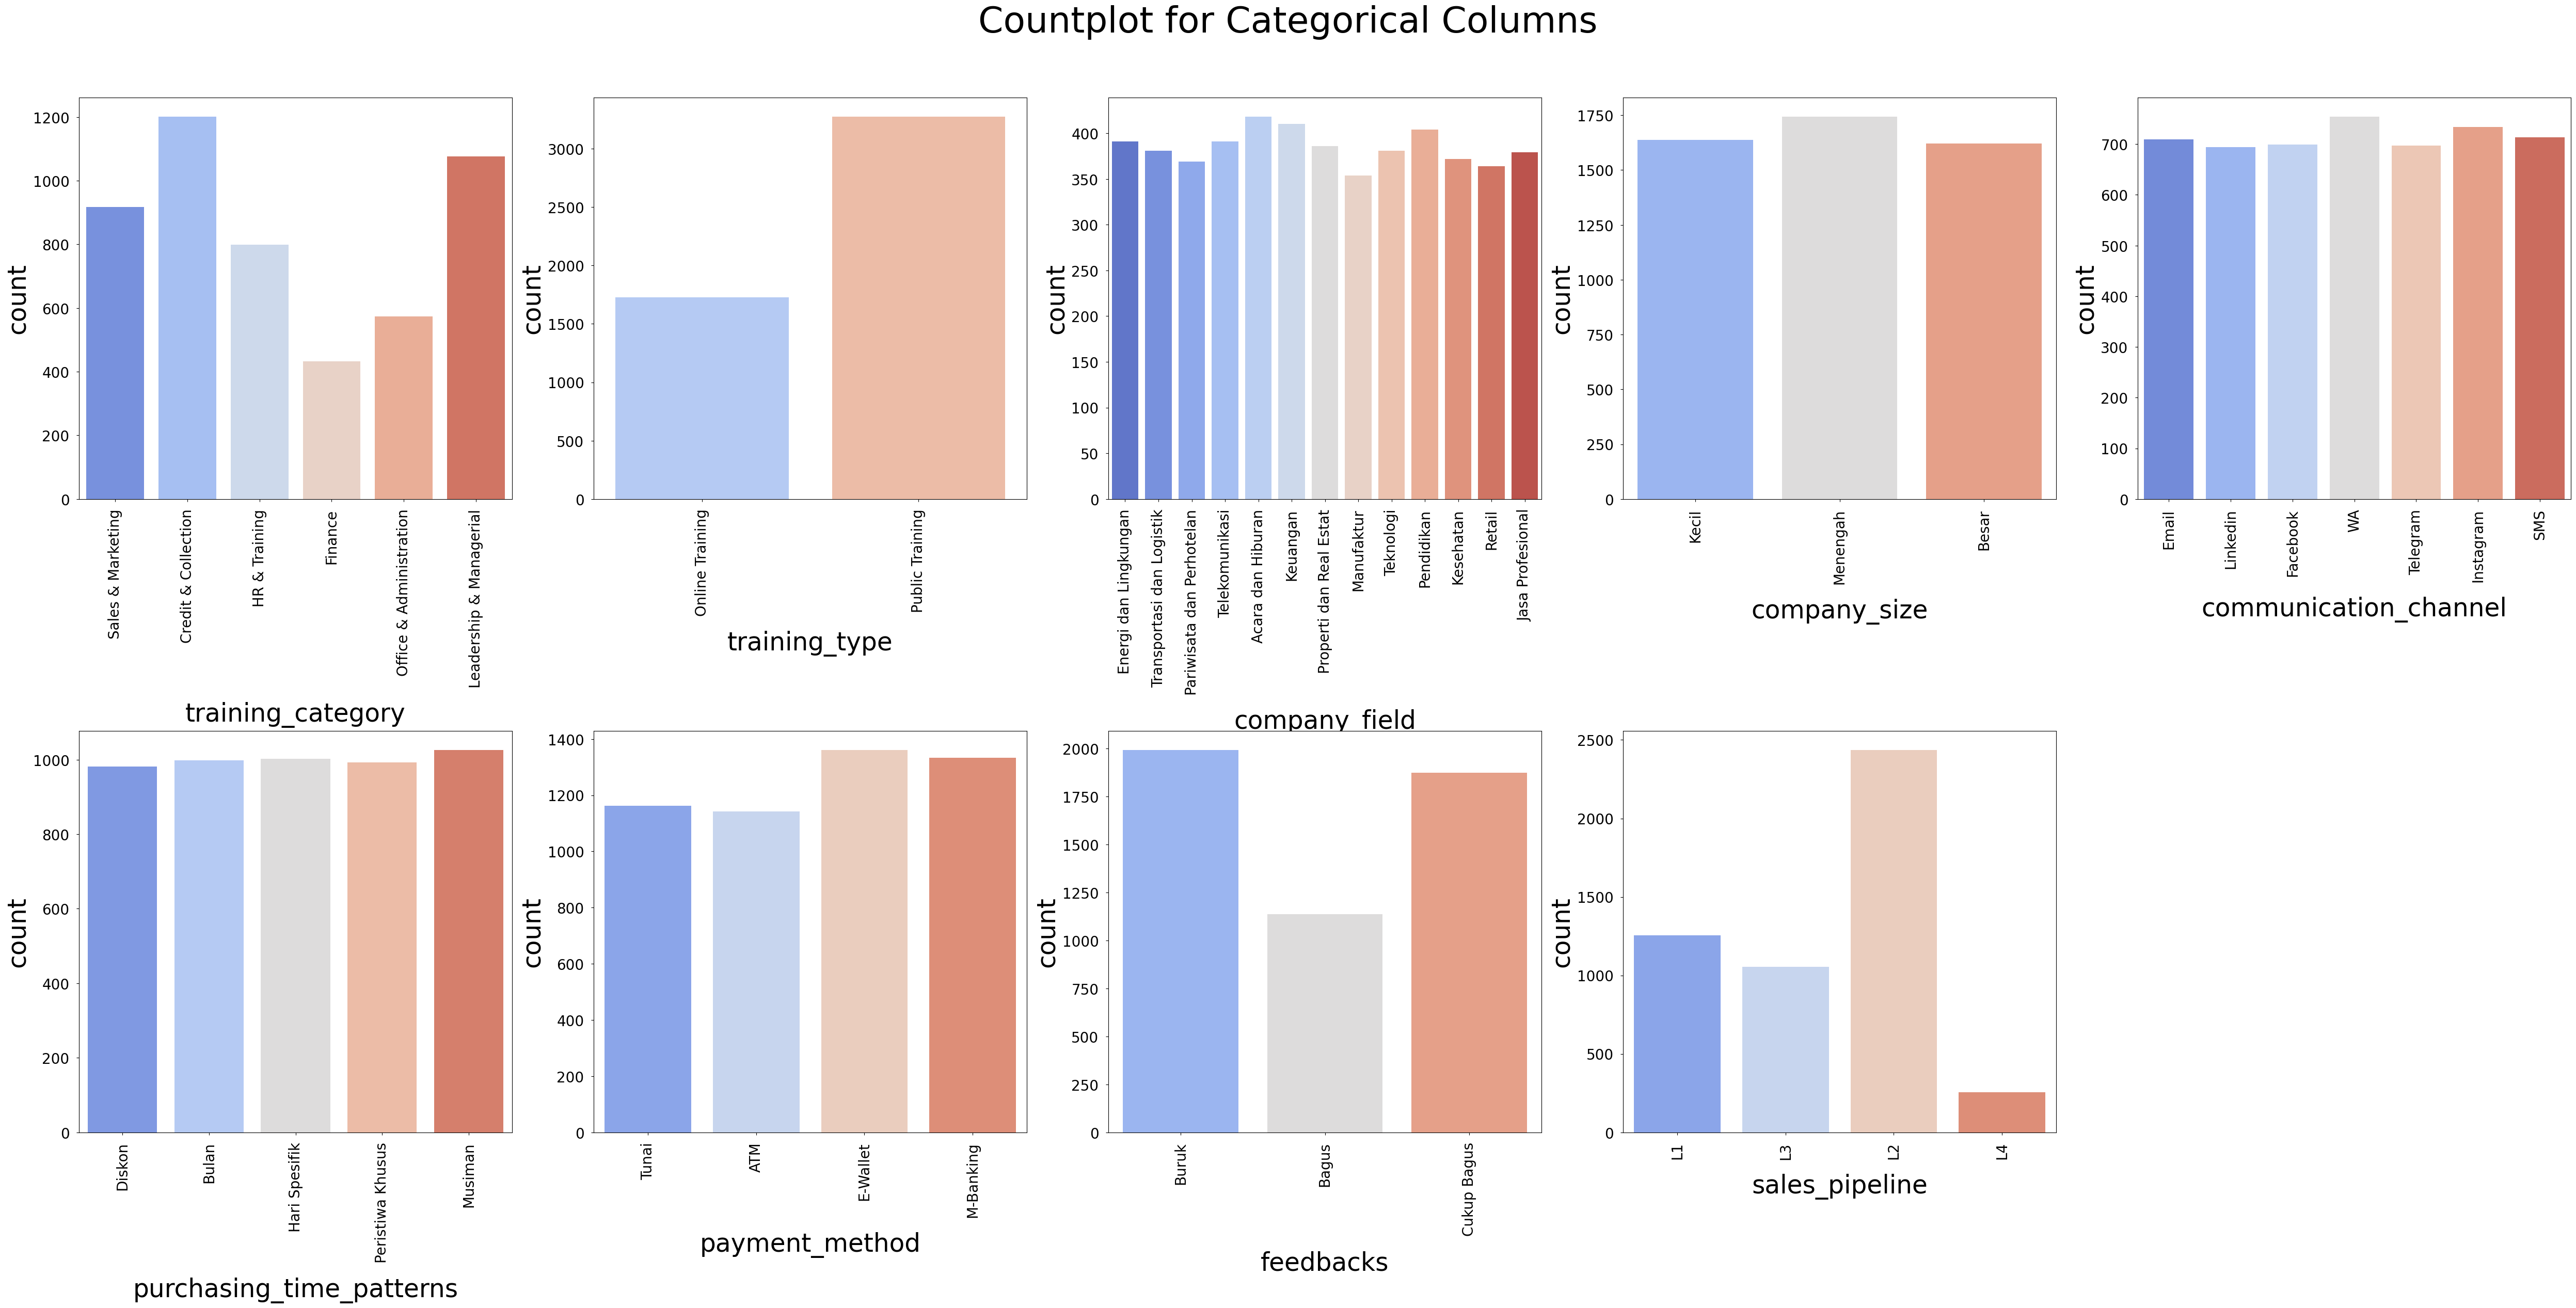

In [ ]:
plt.figure(figsize=(50, 60))

for i in range(0, len(categorical_data)):
    plt.subplot(5, 5, i + 1)
    ax = sns.countplot(x=df[categorical_data[i]], palette='coolwarm', orient='h')
    ax.tick_params(axis='both', which='major', pad=10)
    plt.tight_layout()
    plt.xticks(rotation=90, fontsize=20)
    plt.yticks(fontsize=20)
    ax.set_ylabel('count', fontsize=35)
    ax.set_xlabel(categorical_data[i], fontsize=35)
    ax.xaxis.labelpad = 20

# Menambahkan judul keseluruhan
plt.suptitle('Countplot for Categorical Columns', fontsize=50)
plt.subplots_adjust(top=0.95)
plt.show()

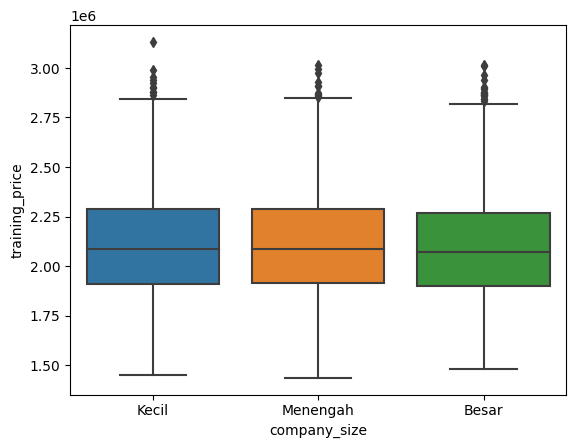

In [ ]:
# Analisis hubungan antara company_size dan training_price
sns.boxplot(data=df, x='company_size', y='training_price')
plt.show()

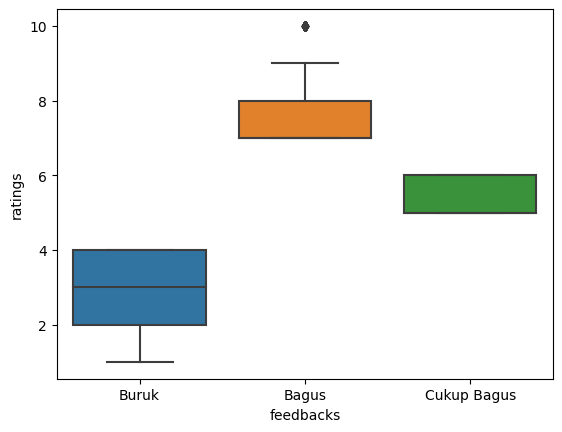

In [ ]:
# Hubungan antara ratings dan feedback
sns.boxplot(data=df, x='feedbacks', y='ratings')
plt.show()

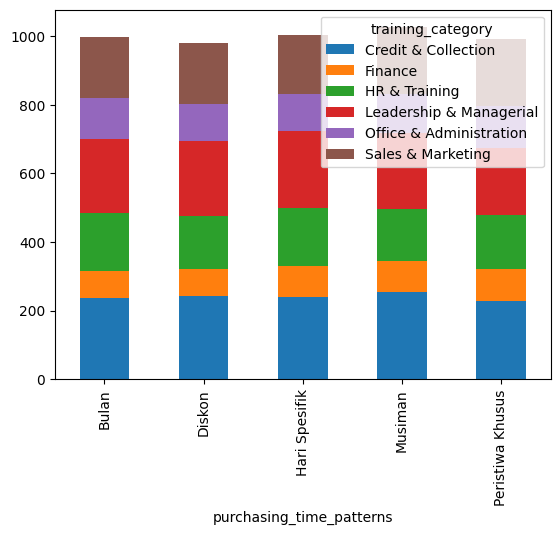

In [ ]:
# Analisis waktu pembelian dan kategori pelatihan
pd.crosstab(df['purchasing_time_patterns'], df['training_category']).plot(kind='bar', stacked=True)
plt.show()

## Numerical

In [ ]:
numerical_data = df.select_dtypes(include=['int64']).columns

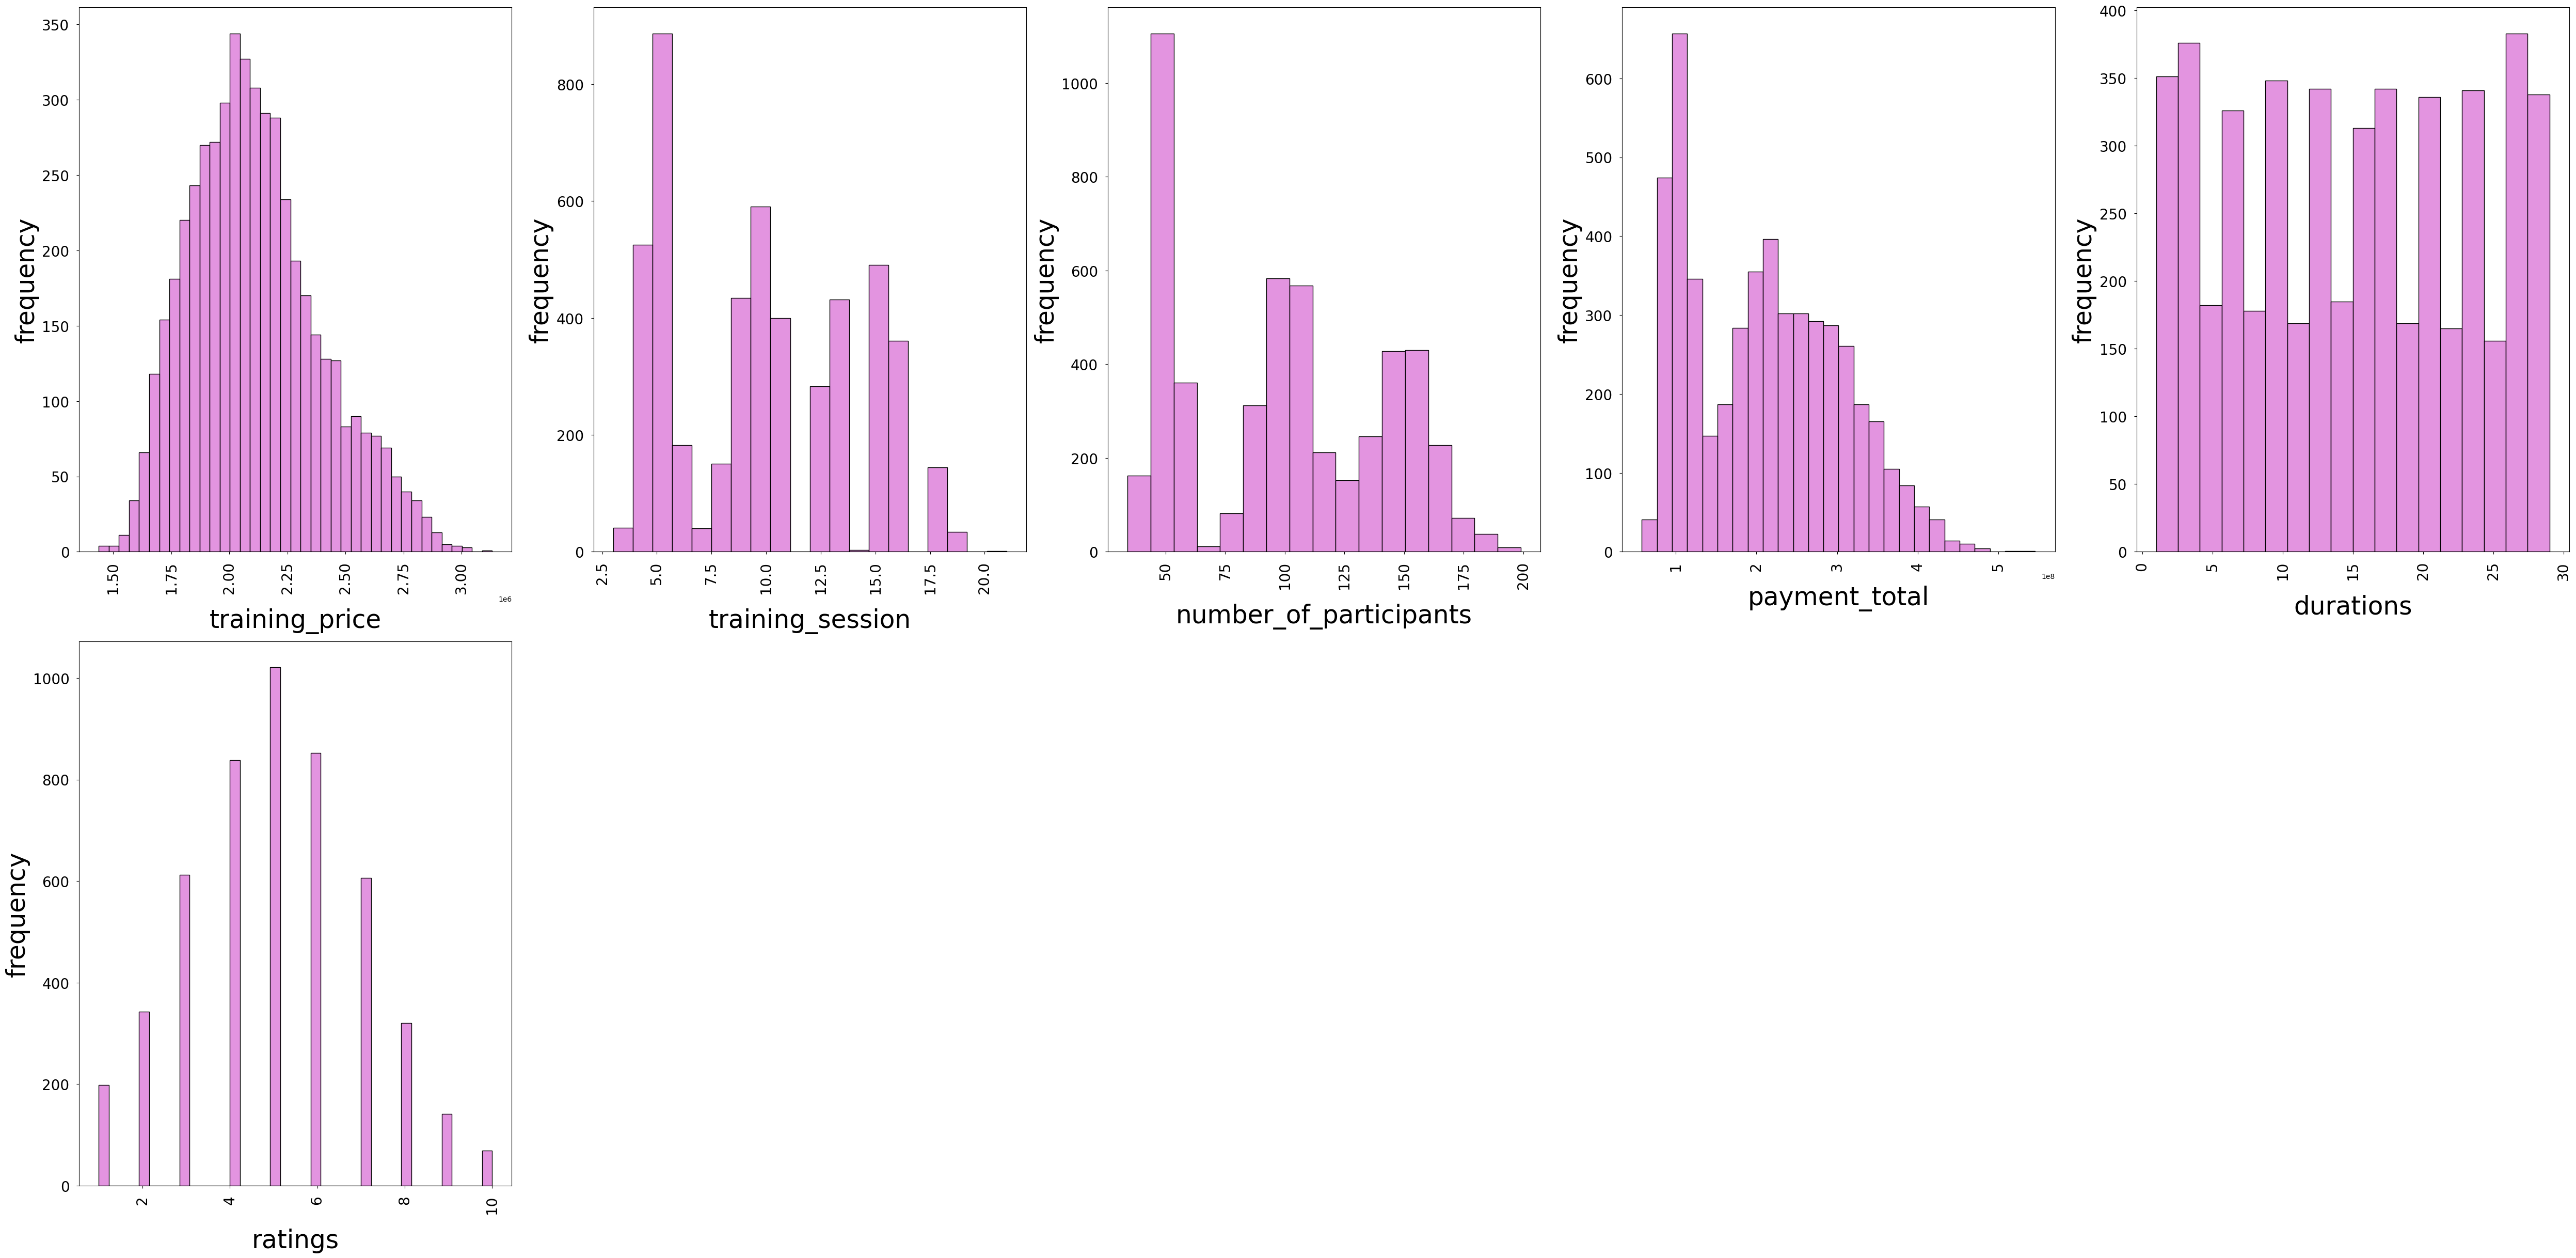

In [ ]:
# Membuat subplot dengan 4 baris dan 3 kolom
plt.figure(figsize=(50, 60))

# Menggunakan loop untuk membuat histogram untuk setiap kolom
for i in range(0, len(numerical_data)):
    plt.subplot(5, 5, i + 1)
    ax = sns.histplot(x=df[numerical_data[i]], color='orchid')
    ax.tick_params(axis='both', which='major', pad=10)
    plt.tight_layout()
    plt.xticks(rotation=90, fontsize=20)
    plt.yticks(fontsize=20)
    ax.set_ylabel('frequency', fontsize=35)  # Mengatur label sumbu y
    ax.set_xlabel(numerical_data[i], fontsize=35)  # Mengatur label sumbu x
    ax.xaxis.labelpad = 20

# Menyusun subplot dan menampilkan plot
plt.tight_layout()
plt.show()

<ipython-input-64-80d3c8608176>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


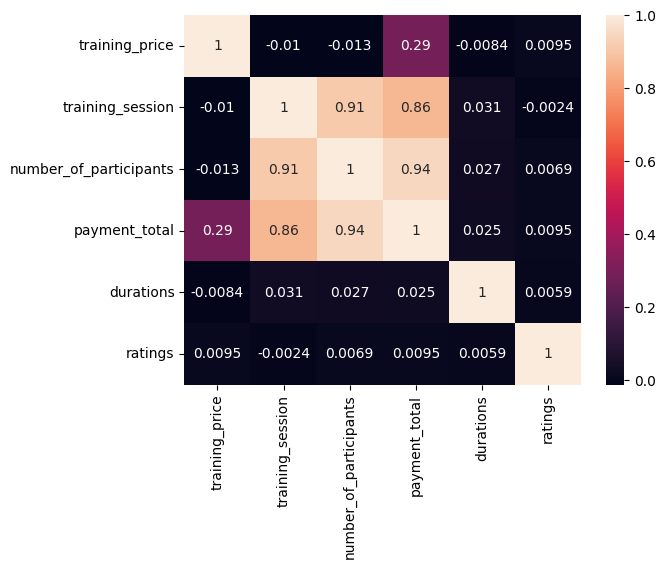

In [ ]:
# Analisis korelasi antara fitur numerik
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# One Hot Encoding

In [ ]:
# Melakukan one-hot encoding untuk semua kolom kategori
one_hot_encoded = pd.get_dummies(df[categorical_data])

# Gabungkan hasil one-hot encoding dengan DataFrame asli
df_encoded = pd.concat([df, one_hot_encoded], axis=1)

# Hapus kolom-kolom asli yang telah diubah menjadi one-hot encoding
df_encoded = df_encoded.drop(columns=categorical_data)

# Scalling

In [ ]:
# Lakukan scaling pada kolom-kolom numerik
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
scaled_numerical_data = scaler.fit_transform(df[numerical_columns])
scaled_numerical_df = pd.DataFrame(scaled_numerical_data, columns=numerical_columns)
scaled_numerical_df.head()

,training_price,training_session,number_of_participants,payment_total,durations,ratings
0,0.782167,0.111111,0.096970,0.164548,0.892857,0.333333
1,0.334148,0.277778,0.393939,0.288003,0.321429,1.000000
2,0.744799,0.277778,0.466667,0.495653,0.535714,1.000000
3,0.366834,0.555556,0.866667,0.628505,0.142857,0.333333
4,0.381362,0.277778,0.363636,0.282883,1.000000,0.111111


In [ ]:
# Gabungkan kedua DataFrame (numerik dan kategori)
scaled_combined_df = pd.concat([scaled_numerical_df, df_encoded], axis=1)
scaled_combined_df

,training_price,training_session,number_of_participants,payment_total,durations,ratings,training_price,training_session,number_of_participants,payment_total,...,payment_method_E-Wallet,payment_method_M-Banking,payment_method_Tunai,feedbacks_Bagus,feedbacks_Buruk,feedbacks_Cukup Bagus,sales_pipeline_L1,sales_pipeline_L2,sales_pipeline_L3,sales_pipeline_L4
0,0.782167,0.111111,0.096970,0.164548,0.892857,0.333333,2762659,5,50,138132950,...,0,0,1,0,1,0,1,0,0,0
1,0.334148,0.277778,0.393939,0.288003,0.321429,1.000000,2003506,8,99,198347094,...,0,0,0,1,0,0,0,0,1,0
2,0.744799,0.277778,0.466667,0.495653,0.535714,1.000000,2699341,8,111,299626851,...,0,0,0,1,0,0,0,0,1,0
3,0.366834,0.555556,0.866667,0.628505,0.142857,0.333333,2058892,13,177,364423884,...,0,0,0,0,1,0,0,1,0,0
4,0.381362,0.277778,0.363636,0.282883,1.000000,0.111111,2083509,8,94,195849846,...,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.360107,0.444444,0.448485,0.334712,0.500000,0.555556,2047493,11,108,221129244,...,0,0,0,0,0,1,0,1,0,0
4996,0.232183,0.055556,0.109091,0.076520,0.250000,0.000000,1830730,4,52,95197960,...,0,0,1,0,1,0,1,0,0,0
4997,0.408002,0.722222,0.593939,0.457426,0.071429,0.333333,2128649,16,132,280981668,...,0,1,0,0,1,0,0,1,0,0
4998,0.332429,0.666667,0.727273,0.513008,0.500000,0.444444,2000593,15,154,308091322,...,0,0,0,0,0,1,0,0,1,0
